In [25]:
import scipy
from scipy.interpolate import griddata
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [26]:
data = pd.read_csv('hafas_vbb.csv', index_col=0)
data.iloc[100:150]

,latitude,longitude,min travel time,shortest trip


In [27]:
def f(lat, lon):
    ret = data[(data['longitude']==lon) & (data['latitude']==lat)]['min travel time'].iloc[0]        
    return ret

# f(52.508708, 13.473981)

In [28]:
points = data[['latitude','longitude']].to_numpy()
values = data[['min travel time']].to_numpy().squeeze()

In [29]:
bottomleft = np.min(points, axis=0)
topright = np.max(points, axis=0)
NUM_INTERPOLATED_POINTS = 1000j
grid_x, grid_y = np.mgrid[bottomleft[0]:topright[0]:NUM_INTERPOLATED_POINTS, bottomleft[1]:topright[1]:NUM_INTERPOLATED_POINTS]

In [30]:
grid_z0 = griddata(points, values, (grid_x, grid_y), method='nearest')
grid_z1 = griddata(points, values, (grid_x, grid_y), method='linear')
grid_z2 = griddata(points, values, (grid_x, grid_y), method='linear')

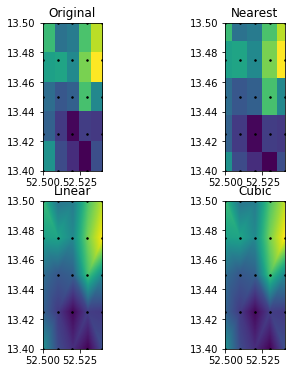

In [31]:
map_extent = (bottomleft[0],topright[0],bottomleft[1],topright[1])
plt.subplot(221)
grid_0 = np.zeros((5,5))
for i in range(5):
    for j in range(5):
        grid_0[i,j] = f(points[5*i+j, 0], points[5*i+j, 1])
plt.imshow(grid_0.T, extent=map_extent, origin='upper')
plt.plot(points[:,0], points[:,1], 'k.', ms=3)
plt.title('Original')
plt.subplot(222)
plt.imshow(grid_z0.T, extent=map_extent, origin='lower')
plt.plot(points[:,0], points[:,1], 'k.', ms=3)
plt.title('Nearest')
plt.subplot(223)
plt.imshow(grid_z1.T, extent=map_extent, origin='lower')
plt.plot(points[:,0], points[:,1], 'k.', ms=3)
plt.title('Linear')
plt.subplot(224)
plt.imshow(grid_z2.T, extent=map_extent, origin='lower')
plt.plot(points[:,0], points[:,1], 'k.', ms=3)
plt.title('Cubic')
plt.gcf().set_size_inches(6, 6)
plt.show()

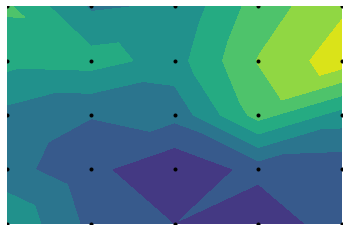

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.contourf(grid_x,grid_y,grid_z1)
plt.plot(points[:,0],points[:,1],'k.')
plt.axis('off')
plt.savefig('./overlay.png', bbox_inches='tight')

In [33]:
np.save('./grid_z1.npy', grid_z1)